In [116]:
#Imports 
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

In [117]:
#Data fetching
df = pd.read_csv('data/Brain Tumor.csv')

In [118]:
print(df.shape)
df.head()

(3762, 15)


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [143]:
df['Class'].value_counts(normalize = True)

0    0.563315
1    0.436685
Name: Class, dtype: float64

In [119]:
# Profile report
# profile = ProfileReport(df)
# profile

In [120]:
pd.DataFrame(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Class,3762.0,4.473684e-01,0.497288,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Mean,3762.0,9.488890e+00,5.728022,7.865906e-02,4.982395e+00,8.477531e+00,1.321272e+01,3.323997e+01
Variance,3762.0,7.111011e+02,467.466896,3.145628e+00,3.632255e+02,6.225804e+02,9.669543e+02,2.910582e+03
Standard Deviation,3762.0,2.518227e+01,8.773526,1.773592e+00,1.905847e+01,2.495156e+01,3.109589e+01,5.394981e+01
Entropy,3762.0,7.360262e-02,0.070269,8.815796e-04,6.856456e-03,6.662805e-02,1.132844e-01,3.945386e-01
Skewness,3762.0,4.102727e+00,2.560940,1.886014e+00,2.620203e+00,3.422210e+00,4.651737e+00,3.693129e+01
Kurtosis,3762.0,2.438907e+01,56.434747,3.942402e+00,7.252852e+00,1.235909e+01,2.264030e+01,1.371640e+03
Contrast,3762.0,1.279615e+02,109.499601,3.194733e+00,7.212521e+01,1.067374e+02,1.610590e+02,3.382574e+03
Energy,3762.0,2.047051e-01,0.129352,2.473117e-02,6.961745e-02,2.254965e-01,2.989014e-01,5.896818e-01
ASM,3762.0,5.863159e-02,0.058300,6.116308e-04,4.846590e-03,5.084867e-02,8.934206e-02,3.477246e-01


Coarseness column is unusable since it is composed of the same value, let's drop it

In [121]:
df.drop('Coarseness', axis = 1, inplace = True)

In [122]:
skewness = []
for col in df.columns.drop(['Class', 'Image']):
    skewness.append(df[col].skew())
skew_per_column = pd.DataFrame(pd.Series(skewness,  index = df.columns.drop(['Class', 'Image']))).rename({0:'skew'}, axis = 1)
skew_per_column

,skew
Mean,0.773241
Variance,1.071127
Standard Deviation,0.184992
Entropy,0.954313
Skewness,4.332738
Kurtosis,11.308936
Contrast,10.249119
Energy,0.185695
ASM,1.102947
Homogeneity,-0.287805


Some column are heavily skewed : 

In [123]:
column_skewed = skew_per_column.loc[skew_per_column['skew'] > 0.75]
column_skewed

,skew
Mean,0.773241
Variance,1.071127
Entropy,0.954313
Skewness,4.332738
Kurtosis,11.308936
Contrast,10.249119
ASM,1.102947
Dissimilarity,1.954792


In [124]:
for col in column_skewed.index.values:
    df[col] = df[col].apply(np.log1p)

In [125]:
skewness = []
for col in df.columns.drop(['Class', 'Image']):
    skewness.append(df[col].skew())
skew_per_column = pd.DataFrame(pd.Series(skewness,  index = df.columns.drop(['Class', 'Image']))).rename({0:'skew'}, axis = 1)
skew_per_column

,skew
Mean,-0.595351
Variance,-1.099685
Standard Deviation,0.184992
Entropy,0.816068
Skewness,1.425495
Kurtosis,1.296765
Contrast,-0.369895
Energy,0.185695
ASM,0.973880
Homogeneity,-0.287805


In [126]:
# There're some outliers in the 'Kurtosis' variable 
# --> Remove them
df['Kurtosis'].describe()

count    3762.000000
mean        2.740110
std         0.805975
min         1.597851
25%         2.110559
50%         2.592197
75%         3.162953
max         7.224491
Name: Kurtosis, dtype: float64

In [127]:
quart1, quart3 = df['Kurtosis'].describe().get('25%'), df['Kurtosis'].describe().get('75%')
print(quart1, quart3)

2.110558863220981 3.1629530585158796


In [128]:
IQR = 1.5*(quart3 - quart1)
kurtosis_outliers = df['Kurtosis'][(df['Kurtosis']< quart1 - IQR) | (df['Kurtosis']> quart3 + IQR)]
print(kurtosis_outliers.shape)
kurtosis_outliers

(82,)


68      4.949837
80      5.672436
88      5.629814
284     4.905594
366     5.744726
          ...   
3684    6.069265
3729    5.040811
3744    6.311936
3745    5.505659
3753    6.454307
Name: Kurtosis, Length: 82, dtype: float64

In [129]:
df = df.drop(kurtosis_outliers.index, axis = 0)

'Correlation' feature have a high right_skew, one can apply a box_cox transformation to deal with this.

In [130]:
from scipy.stats import boxcox

In [131]:
df['Correlation'] = boxcox(x = df['Correlation'].values)[0]

In [219]:
pd.DataFrame(df.skew()).rename({0:'skew'}, axis = 1)

,skew
Class,0.255420
Mean,-0.348773
Variance,-0.787788
Standard Deviation,0.258232
Entropy,0.784882
Skewness,0.748555
Kurtosis,0.702697
Contrast,-0.544469
Energy,0.150402
ASM,0.942869


### Scaling

In [134]:
from sklearn.preprocessing import StandardScaler 
sds = StandardScaler()

In [135]:
X = df.drop(['Class', 'Image'], axis = 1)
y = df['Class']

In [136]:
X_scaled = sds.fit_transform(X)

## Clustering 

### K-means

Fristly, K-mean with K = 2 will be used

In [137]:
from sklearn.cluster import KMeans

In [138]:
km = KMeans(n_clusters =2)
km.fit(X_scaled)
df['Kmeans'] = km.labels_

In [139]:
pd.DataFrame(df[['Kmeans', 'Class']].groupby(['Kmeans', 'Class']).size()).rename({0:'number'}, axis = 1)

number
Kmeans Class        
0      0          35
       1        1491
1      0        2038
       1         116

In [140]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
df['Kmeans'] = df["Kmeans"].map({0:1, 1:0})
print(f'accuracy obtained using K-means : {round(accuracy_score(df["Kmeans"], df["Class"])*100, 2)}%')

accuracy obtained using K-means : 95.9%


In [141]:
print(classification_report(df['Kmeans'], df['Class']))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2154
           1       0.93      0.98      0.95      1526

    accuracy                           0.96      3680
   macro avg       0.96      0.96      0.96      3680
weighted avg       0.96      0.96      0.96      3680



### HAC

In [144]:
from sklearn.cluster import AgglomerativeClustering

In [160]:
hac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hac.fit(X_scaled)
df['AggClust'] = hac.labels_

In [162]:
df['AggClust'] = df["AggClust"].map({0:1, 1:0})
print(f'accuracy obtained using Agglomerative Clustering : {round(accuracy_score(df["AggClust"], df["Class"])*100, 2)}%')
print(classification_report(df['AggClust'], df['Class']))
pd.DataFrame(df[['Class', 'AggClust']].groupby(['Class', 'AggClust']).size()).rename({0:'number'}, axis = 1)

accuracy obtained using Agglomerative Clustering : 97.28%
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2131
           1       0.95      0.99      0.97      1549

    accuracy                           0.97      3680
   macro avg       0.97      0.97      0.97      3680
weighted avg       0.97      0.97      0.97      3680



number
Class AggClust        
0     0           2052
      1             21
1     0             79
      1           1528

## Tumor detection on MRI Images

In [1]:
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
path = 'data/img/'  #only {number.jpg} to be concatenated.

In [3]:

filenames = []
images = []
for filename in os.listdir(path):
    filenames.append(filename)
    image = np.array(cv2.imread(os.path.join(path, filename))) # Fetching images
    image = cv2.resize(image, (64,64), interpolation = cv2.INTER_CUBIC) #resizing to 64*64
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #grayscale
    images.append(image)
images = np.array(images)
print(f'total number of images loaded : {len(images)}')

total number of images loaded : 3762


In [164]:
64*64

4096

In [29]:
#Computing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) # keeping 90% of variance
X = images.reshape(3762, 64*64) #ravelling images 
pca.fit(X)

PCA(n_components=0.95)

In [30]:
#Creating projection matrix
required_dim = pca.components_.shape[0]
proj_matrix = np.empty(shape =(X.shape[1], required_dim)) 

for index in range(required_dim):
    proj_matrix[:,index] = pca.components_[index]
print(f'projection matrix shape : {proj_matrix.shape}')

projection matrix shape : (4096, 279)


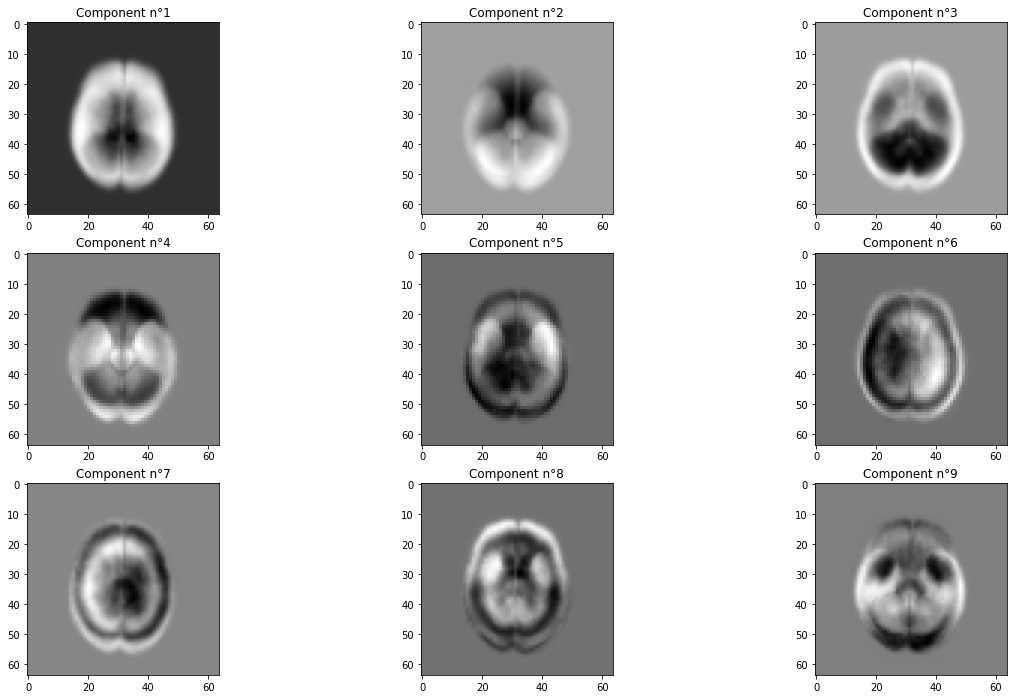

In [31]:
#visualize principal components :
basis = proj_matrix.reshape(64,64, required_dim)

plt.figure(figsize = (20,12))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(basis[:,:,i], 'gray')
    plt.title(f'Component n°{i+1}')
    

In [32]:
# Visialize projected data
projected_data = X.dot(proj_matrix)
projected_data.shape

(3762, 279)

Text(0.5, 1.0, 'reconstructed image')

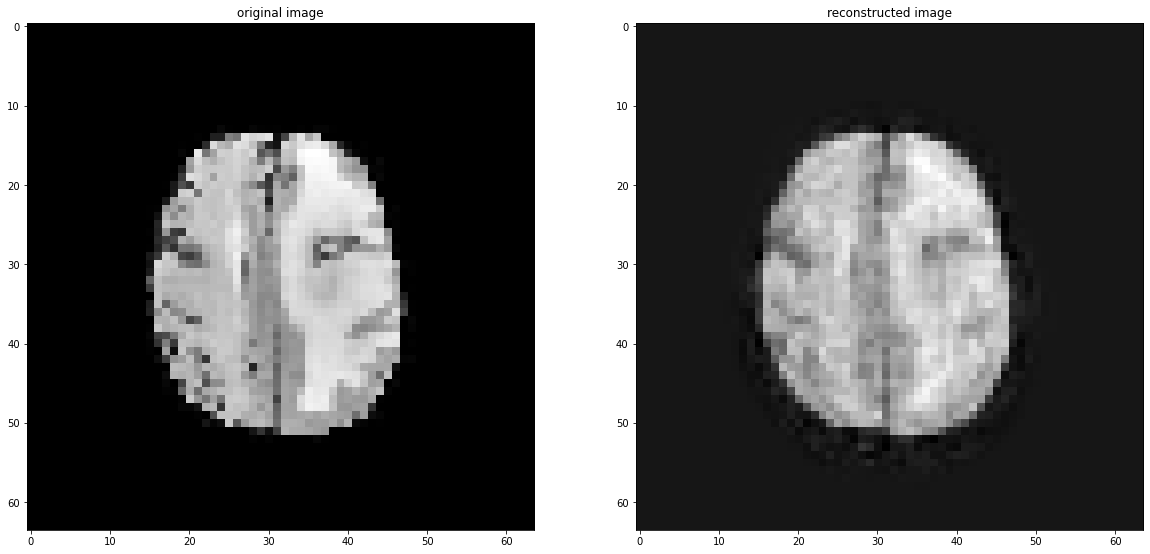

In [212]:
index = np.random.randint(0, 3762)
projected_image = projected_data[index]#np.expand_dims(projected_data[index], 0) # value of each of the 279 principal comp. for this image
projected_image.shape # (1, 279)

reconstructed_image = projected_image.dot(proj_matrix.T).reshape(64,64)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(images[index], 'gray')
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(reconstructed_image, 'gray')
plt.title('reconstructed image')

In [213]:
import plotly.express as px
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

#### Using Agglomerative Clustering on dim-reduced images.

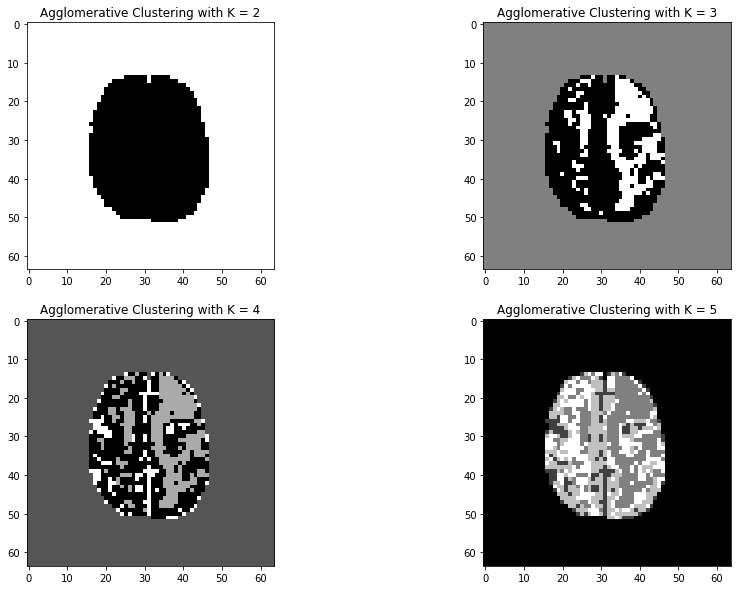

In [214]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15,10))
for k in range(4):
    aggc = AgglomerativeClustering(n_clusters = k+2, affinity = 'euclidean', linkage = 'ward')
    aggc.fit(reconstructed_image.reshape(-1,1))
    labels = aggc.labels_
    labels = labels.reshape(64, 64)
    plt.subplot(2,2,k+1)
    plt.imshow(labels, 'gray')
    plt.title(f'Agglomerative Clustering with K = {k+2}')

### Using K-Means on dim-reduced image

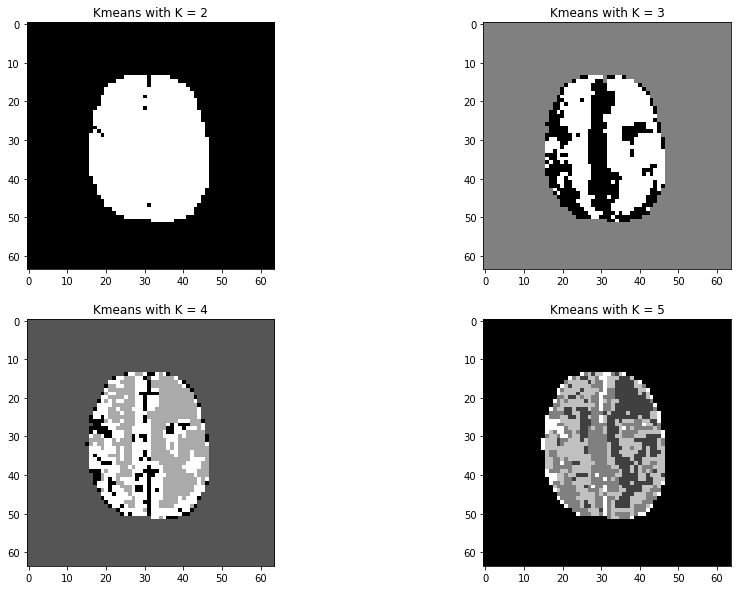

In [215]:
from sklearn.cluster import KMeans


inertia = []
plt.figure(figsize=(15,10))

for k in range(4):
    kmean = KMeans(n_clusters = k+2)
    kmean.fit(reconstructed_image.reshape(-1,1))
    labels = kmean.labels_
    labels = labels.reshape(64, 64)
    inertia.append(kmean.inertia_)
    plt.subplot(2,2,k+1)
    plt.imshow(labels, 'gray')
    plt.title(f'Kmeans with K = {k+2}')

### Using DBSCAN

In [216]:
from sklearn.cluster import DBSCAN

##### First grid search for bests hyperparameters 

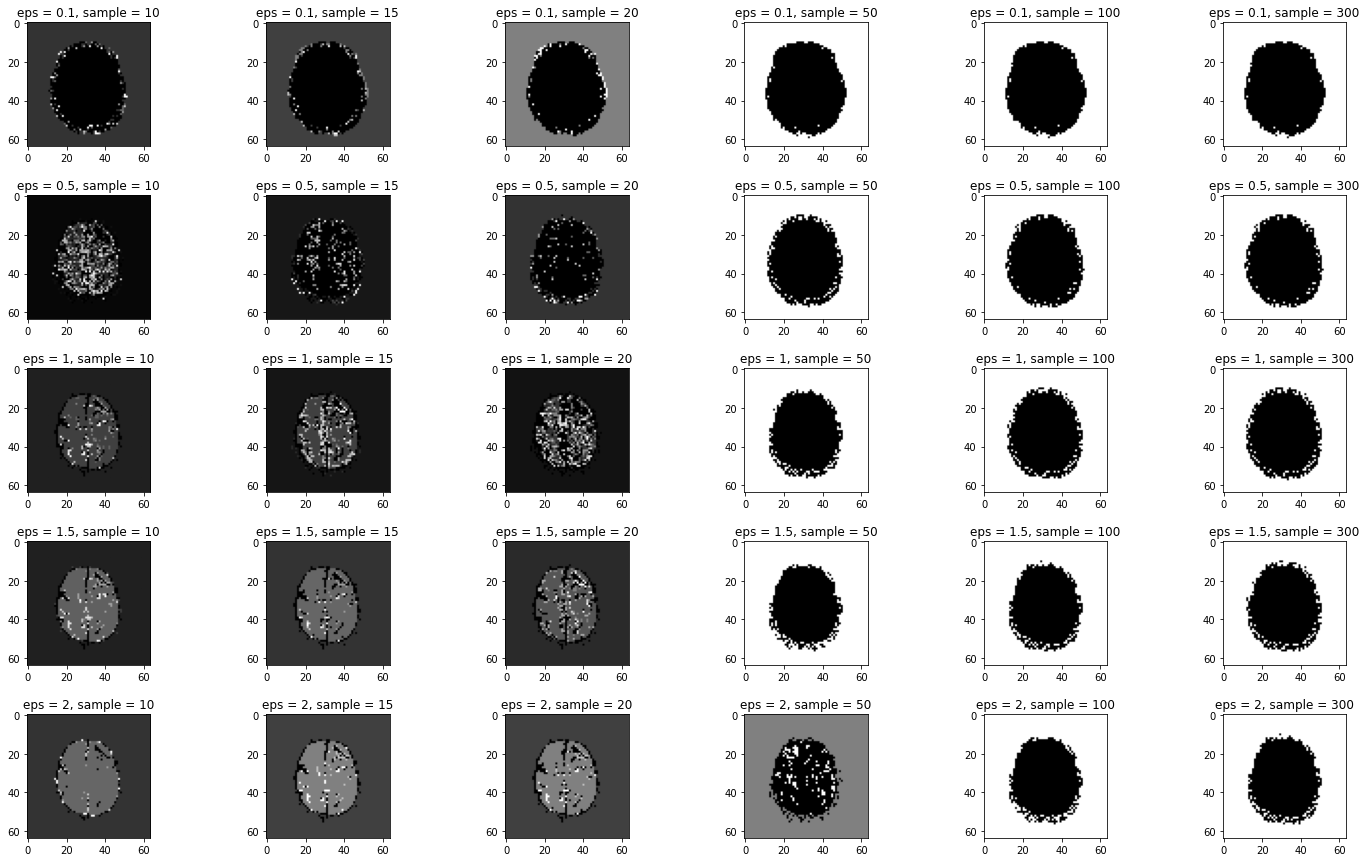

In [217]:
eps = [0.1, 0.5, 1, 1.5, 2]
min_samples = [10, 15, 20, 50, 100, 300]

fig, axs = plt.subplots(5, 6, figsize=(25,15))
axs = axs.ravel()
i = 0
for epsilon in eps:
    for sample in min_samples:
        dbs = DBSCAN(eps = epsilon, min_samples = sample)
        dbs.fit(reconstructed_image.reshape(-1,1))
        labels = dbs.labels_.reshape(64,64)
        axs[i].imshow(labels, 'gray')
        axs[i].set_title(f'eps = {epsilon}, sample = {sample}')
        i = i+1   
    
plt.subplots_adjust(hspace=0.4)
        

##### Search between visually bests parameters

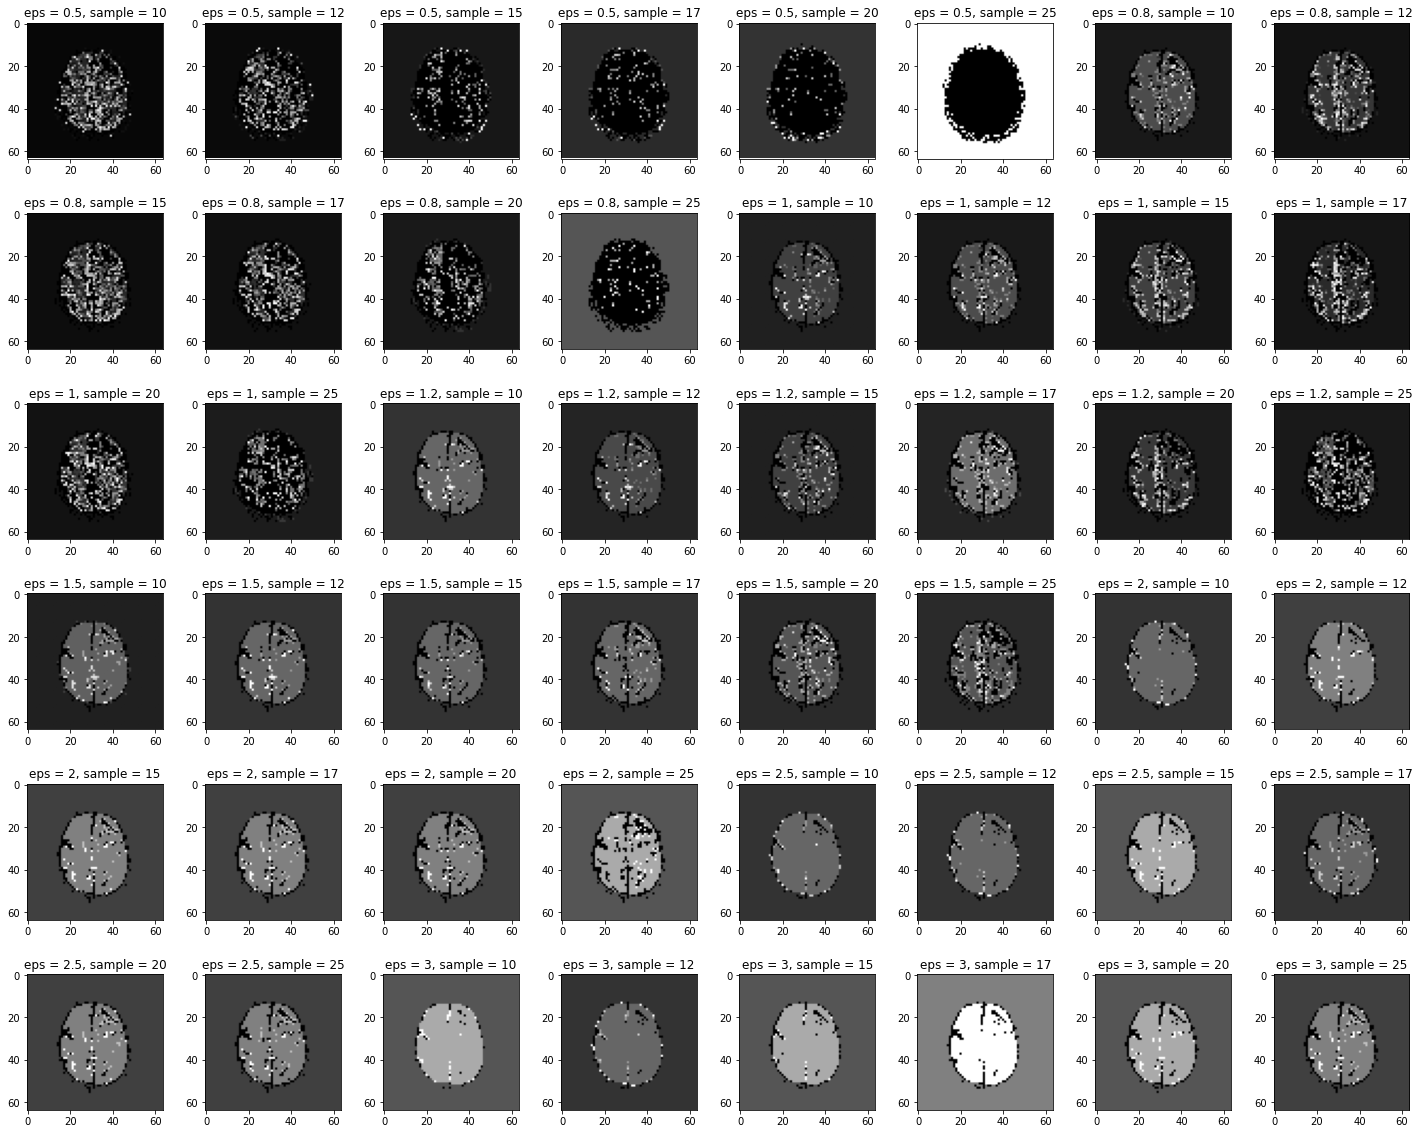

In [218]:
eps = [0.5, 0.8, 1, 1.2, 1.5, 2, 2.5, 3]
min_samples = [10, 12, 15, 17, 20, 25]

fig, axs = plt.subplots(6, 8, figsize=(25,20))
axs = axs.ravel()
i = 0
for epsilon in eps:
    for sample in min_samples:
        dbs = DBSCAN(eps = epsilon, min_samples = sample)
        dbs.fit(reconstructed_image.reshape(-1,1))
        labels = dbs.labels_.reshape(64,64)
        axs[i].imshow(labels, 'gray')
        axs[i].set_title(f'eps = {epsilon}, sample = {sample}')
        i = i+1   
    
plt.subplots_adjust(hspace=0.4)
        